In [1]:
from pathlib import Path
import numpy as np
import logging

import pyvista as pv
pv.set_jupyter_backend("pythreejs")

from project_heart.enums import *
from project_heart.lv import LV

In [2]:
filepath = Path("C:/Users/igorp/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")
# filepath = Path("C:/Users/igornobrega/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")

# Load File and Create Speckles

In [3]:
lv = LV.from_file(filepath, log_level=logging.DEBUG)
lv.identify_regions(LV_GEO_TYPES.IDEAL,
    apex_base_args={"ab_ql":0.03, "ab_qh":0.90},
    endo_epi_args={"threshold":85,})
lv.plot("mesh", 
        scalars=LV_MESH_DATA.SURFS,
        container="points",
        show_edges=True,
        categorical=True,
        split_sharp_edges=True,
        smooth_shading=False,
        pretty=False,
        vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
        )

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

## Create Longitudinal Speckles

In [4]:
for i, a in enumerate(np.linspace(0, np.pi, 6, endpoint=False)):
    
    spk = lv.create_speckles(
        collection="long-6",
        group="endo",
        name=str(i),
        from_nodeset=LV_SURFS.ENDO,
        exclude_nodeset=LV_SURFS.BASE, # does not afect ideal case
        d=1.75,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.125,
        kmax=0.95,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="long-6",
        group="epi",
        name=str(i),
        from_nodeset=LV_SURFS.EPI,
        exclude_nodeset=LV_SURFS.BASE, # does not afect ideal case
        d=2.4,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.125,
        kmax=0.95,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("long-6", spk_collection="long-6")
lv.plot(
    scalars="long-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

INFO:create_speckles:Speckle: name: 0, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 0, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 1, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 1, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 2, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 2, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 3, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 3, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 4, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 4, group: epi, collection: long-6
INFO:create_speckles:Speckle: name: 5, group: endo, collection: long-6
INFO:create_speckles:Speckle: name: 5, group: epi, collection: long-6


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

In [5]:
scalars = np.zeros(lv.mesh.n_points)


for i, kl_ids in enumerate(spk[0].k_local_ids):
    scalars[spk[0].ids[kl_ids]] = i+1

for i in range(len(spk)):
    print(len(spk[i].k_ids))

plotter = pv.Plotter(lighting='three lights')
plotter.background_color = 'white'

plotter.add_mesh(lv.mesh, scalars=scalars, show_edges=True, cmap="jet")
plotter.show()

18
18
18
18
18
18


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

## Create circumferential speckles

In [6]:
names = ["subapex", "apex", "superapex", "submid", "mid", "supermid", "subbase", "base", "superbase"]

for i, a in enumerate(np.linspace(0.25, 0.95, len(names), endpoint=False)):
    
    spk = lv.create_speckles(
        collection="circ-6",
        group="endo",
        name=names[i],
        from_nodeset=LV_SURFS.ENDO,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="angles",
        cluster_criteria="angles2",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="circ-6",
        group="epi",
        name=names[i],
        from_nodeset=LV_SURFS.EPI,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="angles",
        cluster_criteria="angles2",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("circ-6", spk_collection="circ-6")
lv.plot(
    scalars="circ-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

INFO:create_speckles:Speckle: name: subapex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: subapex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: apex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: apex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: superapex, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: superapex, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: submid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: submid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: mid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: mid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: supermid, group: endo, collection: circ-6
INFO:create_speckles:Speckle: name: supermid, group: epi, collection: circ-6
INFO:create_speckles:Speckle: name: subbase, group: endo, collection: circ-6
INFO:create_spe

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

In [7]:
scalars = np.zeros(lv.mesh.n_points)
for i, kids in enumerate(spk[3].k_ids):
    scalars[kids] = i+1

In [8]:
scalars = np.zeros(lv.mesh.n_points)
scalars[spk[4].ids] = 1

In [9]:
for i in range(len(spk)):
    print(len(spk[i].k_ids))

17
16
16
17
16
16


In [10]:
scalars = np.zeros(lv.mesh.n_points)
for i, kids in enumerate(spk[3].k_ids):
    scalars[kids] = i+1
    
plotter = pv.Plotter(lighting='three lights')
plotter.background_color = 'white'

plotter.add_mesh(lv.mesh, scalars=scalars, show_edges=True, cmap="jet")
plotter.show()

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

# Compute Metric

Using some subset for numerical validation

Expected values for timesteps [0, 0.1 and 1.1]:

- Endo (approx):    157,  106.8,  109.95
- Epi (approx):     219.9,  201,  201
- Mean:             188.45,  153.9,  155.5

In [11]:
circ_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")
lv.circumferential_length(circ_spks, 
                          recompute=True, 
                          approach="k_ids")

INFO:LV.BaseMetricsComputations:Computing metric 'LV_STATES.CIRC_LENGTH'


array([187.14223726, 174.31170125, 165.05109968, 157.50474564,
       151.95521735, 152.03665331, 152.1117174 , 152.17948989,
       152.25502425, 152.32332325, 152.39858641, 152.46685604,
       152.54146398, 152.60941483, 152.68317665, 152.75066093,
       152.82349056, 152.89043844, 152.96230503, 153.02868832,
       153.09959329, 153.16540652, 153.2353666 , 153.30061935,
       153.36966101, 153.43436564, 153.50251791, 153.56669206,
       153.63398548, 153.6976438 , 153.76410528, 153.8272626 ,
       153.89291984, 153.95558759, 154.02046306, 154.0826515 ,
       154.14676608, 154.20848059, 154.27185298, 154.33309561,
       154.39573776, 154.45650547, 154.51842742, 154.57871495,
       154.63991893])

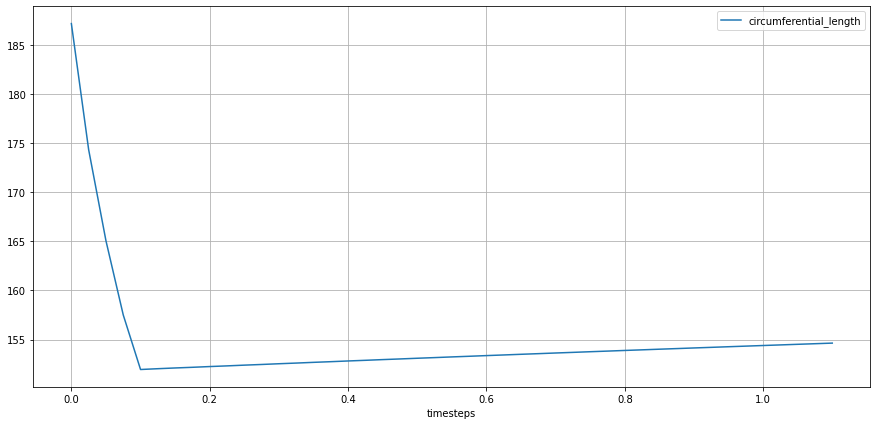

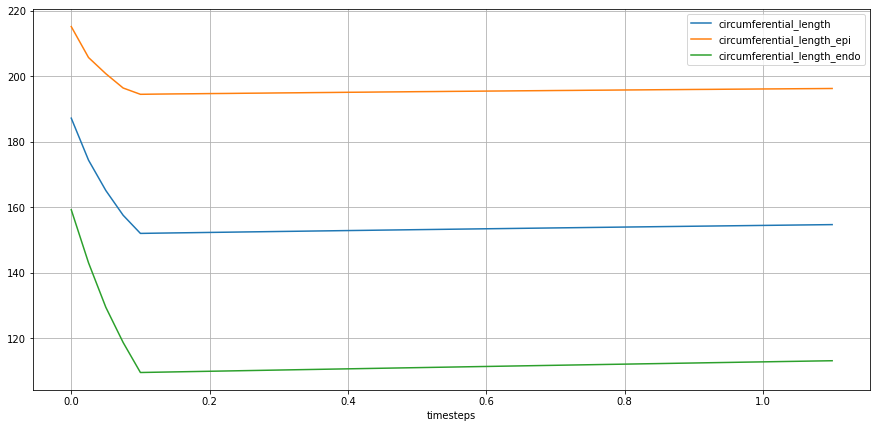

In [16]:
lv.plot_metric(lv.STATES.CIRC_LENGTH, 
    from_ts=0.0,
    plot_infos=["group"])